In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow scikit-learn pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from sklearn.model_selection import train_test_split

In [ ]:
all = pd.read_csv('/content/drive/MyDrive/all_features.csv')

In [ ]:
# 데이터 불러오기
df = all.copy()

# 날짜 정렬
df = df.sort_values(by='DATE').reset_index(drop=True)

# 타겟 설정
target_col = '원/미국달러(매매기준율)'

# 사용할 feature들
features = df.columns.drop(['DATE', target_col])

In [ ]:
for col in df.columns:
    if col != 'DATE' and df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# 스케일링
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
target_scaled = scaler.fit_transform(df[[target_col]])

# 시퀀스 생성 함수
def create_sequences(X, y, seq_length=30):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

# 시퀀스 생성
X_seq, y_seq = create_sequences(scaled, target_scaled)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Bidirectional LSTM 모델
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0176

147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0174 - val_loss: 0.0075
Epoch 2/100
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0019 - val_loss: 0.0074
Epoch 3/100
145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0012

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 4/100
146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0012

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 8.1519e-04 - val_loss: 0.0047
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 8.8935e-04 - val_loss: 0.0039
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 7.9069e-04 - val_loss: 0.0043
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 7.9148e-04 - val_loss: 0.0055
Epoch 9/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 6.9408e-04 - val_loss: 0.0041
Epoch 10/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.3299e-04

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 6.3295e-04 - val_loss: 0.0023
Epoch 11/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 7.6234e-04 - val_loss: 0.0029
Epoch 12/100
145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.2906e-04

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 5.2998e-04 - val_loss: 0.0022
Epoch 13/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 5.7003e-04 - val_loss: 0.0029
Epoch 14/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.4021e-04 - val_loss: 0.0026
Epoch 15/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.4453e-04 - val_loss: 0.0026
Epoch 16/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.1126e-04 - val_loss: 0.0022
Epoch 17/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.9343e-04 - val_loss: 0.0035
Epoch 18/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 7.3331e-04 - val_loss: 0.0025
Epoch 19/100
145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2617e-04

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.2679e-04 - val_loss: 0.0020
Epoch 20/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 5.4772e-04 - val_loss: 0.0037
Epoch 21/100
145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.2240e-04

147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.2142e-04 - val_loss: 0.0011
Epoch 22/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.4368e-04 - val_loss: 0.0031
Epoch 23/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.1924e-04 - val_loss: 0.0016
Epoch 24/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 4.4695e-04 - val_loss: 0.0012
Epoch 25/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 4.5332e-04 - val_loss: 0.0016
Epoch 26/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.8123e-04 - val_loss: 0.0011
Epoch 27/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 3.8182e-04 - val_loss: 0.0012
Epoch 28/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 4.3919e-04 - val_loss: 0.0023
Epoch 29/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.0005e-04 - val_loss: 0.0014
Epoch 30/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.9882e-04 - val_loss: 0.0014
Epoch 31/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 4.0600e-04 - val_los

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 스케일 되돌리기
y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), len(features))), y_pred), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(features))), y_test), axis=1))[:, -1]

# 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("LSTM 모델 평가")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
LSTM 모델 평가
MSE: 10714.14
RMSE: 103.51
R² Score: -0.2525


In [ ]:
import pandas as pd
import numpy as np

# 예측
y_pred_scaled = model.predict(X_test)

# 다시 원래 스케일로 역변환
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test)

# 예측 날짜 생성 (마지막 훈련일 다음 날짜부터 시작)
start_date = pd.to_datetime('2025-03-01')  # 혹은 X_test에 맞는 날짜 시작점
dates = pd.date_range(start=start_date, periods=len(y_pred), freq='D')

# 변화율 계산 (%)
pred_change_pct = [0]  # 첫날은 변화율 없음
for i in range(1, len(y_pred)):
    change = ((y_pred[i] - y_pred[i-1]) / y_pred[i-1]) * 100
    pred_change_pct.append(change[0])  # 2D 배열이므로 [0] 사용

# 데이터프레임으로 정리
results = pd.DataFrame({
    'DATE': dates,
    '예측환율': y_pred.flatten(),
    '예측변화율(%)': np.round(pred_change_pct, 6)
})

print("📊 LSTM (변화율 예측 기반) 환율 예측 결과:")
print(results.head(10))  # 필요시 전체 출력 or 저장


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
📊 LSTM (변화율 예측 기반) 환율 예측 결과:
        DATE         예측환율  예측변화율(%)
0 2025-03-01  1079.429810  0.000000
1 2025-03-02  1079.818970  0.036052
2 2025-03-03  1080.211182  0.036322
3 2025-03-04  1079.977173 -0.021663
4 2025-03-05  1080.963745  0.091351
5 2025-03-06  1081.508179  0.050366
6 2025-03-07  1081.685425  0.016389
7 2025-03-08  1084.154785  0.228288
8 2025-03-09  1086.311890  0.198966
9 2025-03-10  1087.768433  0.134081


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

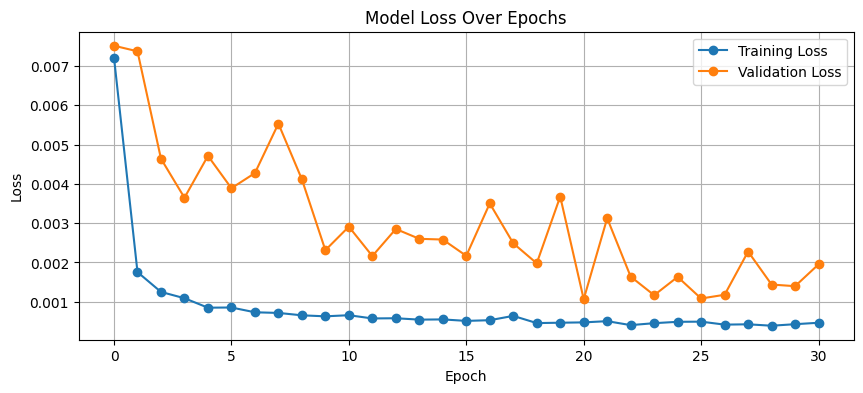

In [ ]:
plot_training_history(history)